Training on delaney...
Mean Squared Error for fold 0 = 1.2097276359873086
Mean Squared Error for fold 1 = 1.1424578400840444
Mean Squared Error for fold 2 = 1.104376881706202
Mean Squared Error for fold 3 = 1.5731241865134584
Mean Squared Error for fold 4 = 1.3487210409010248
[]
Training on huuskonen...
Mean Squared Error for fold 0 = 1.1755408026906955
Mean Squared Error for fold 1 = 1.017220164997611
Mean Squared Error for fold 2 = 1.2450748946074122
Mean Squared Error for fold 3 = 1.1591162585755748
Mean Squared Error for fold 4 = 1.1899588199987252
[]
Training on aqsoldb...
Mean Squared Error for fold 0 = 3.0705769159302423
Mean Squared Error for fold 1 = 3.1455050025353524
Mean Squared Error for fold 2 = 3.1535376971734452
Mean Squared Error for fold 3 = 3.2866862636584604
Mean Squared Error for fold 4 = 4.049683150960133
[]


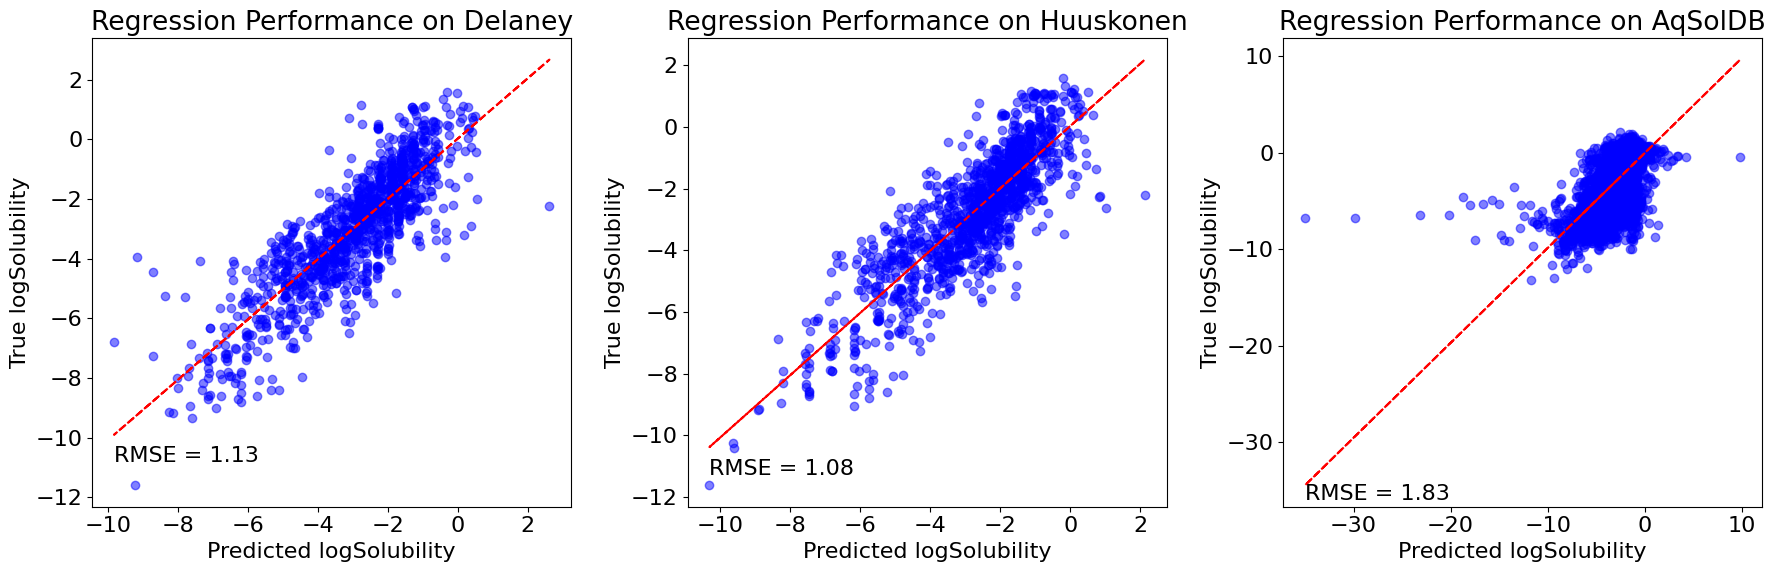

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.train import train
from sklearn.linear_model import LinearRegression, Lasso
from utils.features import AtomFeature
from utils.dataset_reader import DelaneyReader
from scipy.stats import linregress
from rdkit import RDLogger   
import math
from sklearn.metrics import mean_squared_error

RDLogger.DisableLog('rdApp.*')       

feature = AtomFeature(list(range(1, 61)))
model = Lasso(alpha=0.01)  # adjust the alpha value as per requirement
reader = DelaneyReader()

datasets = ['delaney_folds', 'huuskonen_folds', 'aqsoldb_folds']
raw_datasets = ['delaney', 'huuskonen', 'aqsoldb']
names = ['Delaney', 'Huuskonen', 'AqSolDB']

run_ids = ['atomfeature/RUN1', 'atomfeature/RUN2', 'atomfeature/RUN3']

plt.figure(figsize=(18, 6))
plt.rcParams.update({'font.size': 16})

for i in range(3):
    # Train the model
    print(f'Training on {raw_datasets[i]}...')
    trues, preds = train(feature=feature,
                        model=model,
                        dataset_path=f"../data/kfolds/{datasets[i]}.csv",
                        dataset_reader=reader, run_id = run_ids[i])
    # Plot the results
    plt.subplot(1, 3, i+1)
    plt.scatter(preds, trues, alpha=0.5, color = 'blue')
    slope, intercept, r_value, _, _ = linregress(preds, trues)
    line_fit = intercept + slope * np.array(preds)
    plt.plot(preds, line_fit, color='red', linestyle='dashed')
    plt.title(f'Regression Performance on {names[i]}')
    rmse = math.sqrt(mean_squared_error(trues, preds))  # calculate RMSE here
    plt.text(min(preds), min(preds) - 1, f'RMSE = {rmse:.2f}')  # add RMSE to the annotation
    plt.xlabel('Predicted logSolubility')
    plt.ylabel('True logSolubility')

plt.tight_layout()
plt.show()

Training on delaney...
Mean Squared Error for fold 0 = 1.073057109538866
Mean Squared Error for fold 1 = 0.8548509840578639
Mean Squared Error for fold 2 = 0.6930256913920573
Mean Squared Error for fold 3 = 1.0267037447849656
Mean Squared Error for fold 4 = 0.987626432917796
[]
Training on huuskonen...
Mean Squared Error for fold 0 = 0.7384294011034873
Mean Squared Error for fold 1 = 0.7157939350024791
Mean Squared Error for fold 2 = 0.7927859633539135
Mean Squared Error for fold 3 = 0.8487303163766838
Mean Squared Error for fold 4 = 0.8256203905903973
[]
Training on aqsoldb...
Mean Squared Error for fold 0 = 2.7849549024608447
Mean Squared Error for fold 1 = 2.891803795789808
Mean Squared Error for fold 2 = 2.715180355790518
Mean Squared Error for fold 3 = 2.8935353144113627
Mean Squared Error for fold 4 = 3.6940917834095117
[]


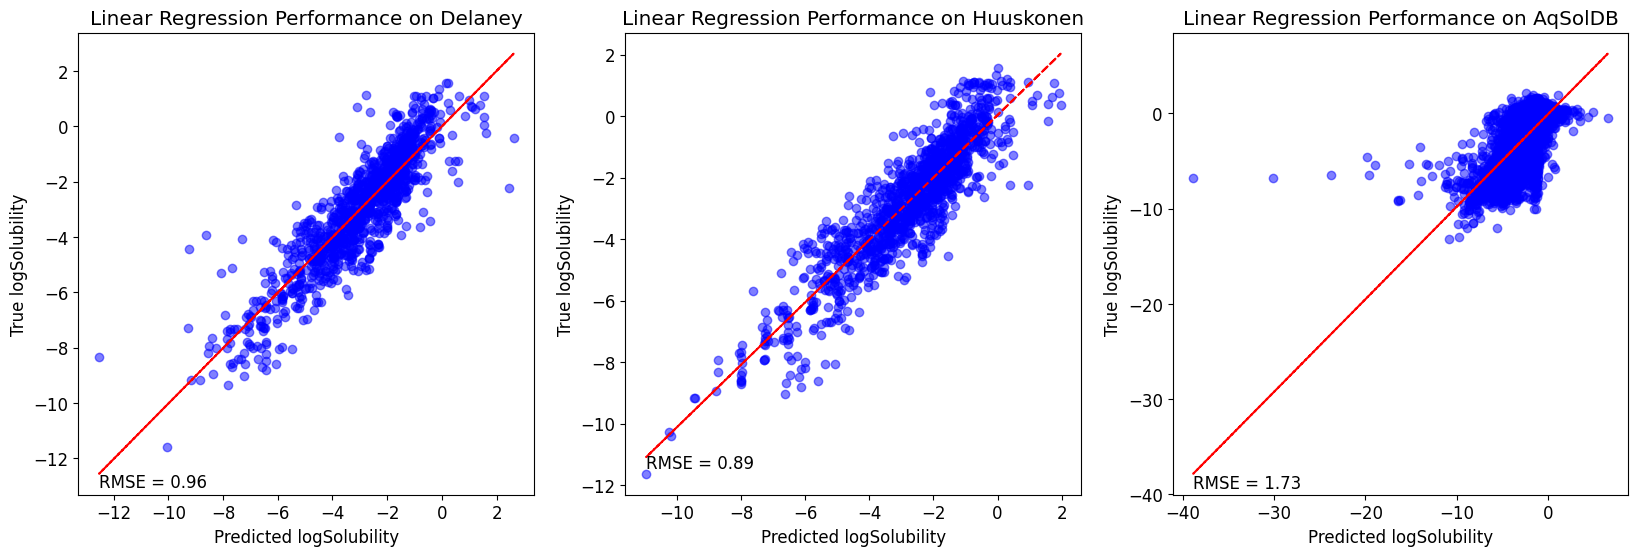

In [ ]:
from sklearn.linear_model import LinearRegression
from utils.features import AtomFeature, FunctionalGroupFeature, IntegrateFeature
from utils.dataset_reader import DelaneyReader
from utils.train import train
from utils.visualization import weight_histogram

"""
Model: Linear Regression Model
Features: Atom Number Feature, Functional Group Feature
"""

atom_feature = AtomFeature(list(range(1, 61)))
function_group_feature = FunctionalGroupFeature()
feature = IntegrateFeature([atom_feature, function_group_feature])
model = Lasso(alpha=0.01)  # adjust the alpha value as per requirement
reader = DelaneyReader()

datasets = ['delaney_folds', 'huuskonen_folds', 'aqsoldb_folds']
raw_datasets = ['delaney', 'huuskonen', 'aqsoldb']
names = ['Delaney', 'Huuskonen', 'AqSolDB']

run_ids = ['functionalfeature/RUN1', 'functionalfeature/RUN2', 'functionalfeature/RUN3']

plt.figure(figsize=(20, 6))

for i in range(3):
    # Train the model
    print(f'Training on {raw_datasets[i]}...')
    trues, preds = train(feature=feature,
                        model=model,
                        dataset_path=f"../data/kfolds/{datasets[i]}.csv",
                        dataset_reader=reader, run_id = run_ids[i])
    # Plot the results
    plt.subplot(1, 3, i+1)
    plt.scatter(preds, trues, alpha=0.5, color = 'blue')
    slope, intercept, r_value, _, _ = linregress(preds, trues)
    line_fit = intercept + slope * np.array(preds)
    plt.plot(preds, line_fit, color='red', linestyle='dashed')
    plt.title(f'Linear Regression Performance on {names[i]}')
    rmse = math.sqrt(mean_squared_error(trues, preds))  # calculate RMSE here
    plt.text(min(preds), min(preds) - 0.5, f'RMSE = {rmse:.2f}')  # add RMSE to the annotation
    plt.xlabel('Predicted logSolubility')
    plt.ylabel('True logSolubility')

Training on delaney...
Mean Squared Error for fold 0 = 1.1901498282456866
Mean Squared Error for fold 1 = 1.1387973405557834
Mean Squared Error for fold 2 = 1.1076801429351233
Mean Squared Error for fold 3 = 1.5582836407134837
Mean Squared Error for fold 4 = 1.3289916135693665
[]


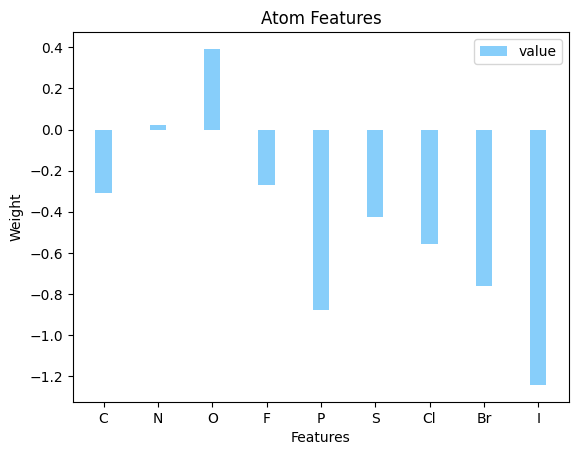

([-0.30921447,
  0.02081424,
  0.3926683,
  -0.26923433,
  -0.8765338,
  -0.42349938,
  -0.5551921,
  -0.76184464,
  -1.2433677],
 ['C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Br', 'I'])

In [1]:
from sklearn.linear_model import LinearRegression
from utils.features import AtomFeature
from utils.dataset_reader import DelaneyReader
from utils.train import train
from utils.visualization import weight_histogram

"""
Model: Linear Regression Model
Features: Atom Number Feature
"""

feature = AtomFeature(list(range(1, 61)))
model = LinearRegression()
reader = DelaneyReader()

print(f'Training on delaney...')
trues, preds = train(feature=feature,
                    model=model,
                    dataset_path=f"../data/kfolds/delaney_folds.csv",
                    dataset_reader=reader, run_id = 'RUN1')

weight_histogram(model.coef_,
                 feature.description(),
                 mode='cleanup',
                 title='Atom Features')


Training on delaney...
Mean Squared Error for fold 0 = 2.28424902885725
Mean Squared Error for fold 1 = 2.5026468303432954
Mean Squared Error for fold 2 = 1.9952275988536863
Mean Squared Error for fold 3 = 2.2234114931090394
Mean Squared Error for fold 4 = 2.463021750513389
[]


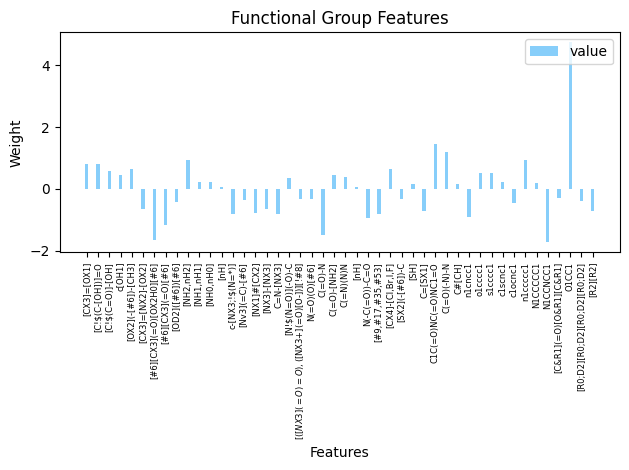

In [1]:
from sklearn.linear_model import LinearRegression
from utils.features import AtomFeature, FunctionalGroupFeature, IntegrateFeature
from utils.dataset_reader import DelaneyReader
from utils.train import train
from utils.visualization import weight_histogram

"""
Model: Linear Regression Model
Features: Atom Number Feature, Functional Group Feature
"""

atom_feature = AtomFeature(list(range(1, 61)))
feature = FunctionalGroupFeature()

model = LinearRegression()
reader = DelaneyReader()

print(f'Training on delaney...')
trues, preds = train(feature=feature,
                    model=model,
                    dataset_path=f"../data/kfolds/delaney_folds.csv",
                    dataset_reader=reader, run_id = 'RUN1')

coef, name = weight_histogram(model.coef_, feature.description(),
                              mode='cleanup',
                              title='Functional Group Features')
